In [50]:
import matplotlib
import matplotlib.pylab as plt
import glob
import numpy

# Configuration
RUN_ID = "1"
RUNNING_TIME = 20

In [6]:
RES_DIR = "results/" + RUN_ID

In [37]:
def process_log(filename):
    print("Processing", filename)

    publications = {}
    latencies = {}
    
    with open(lf, 'r') as f:
        for line in f:
            line = [x.strip() for x in line.split(',')]
            
            time = float(line[0])
            node = line[1]
            mtype = line[2]
            mid = line[3]
            
            if mtype == 'PUB':
                publications[mid] = time
            
            if mtype == 'RECV':
                if mid not in latencies:
                    latencies[mid] = []
                latencies[mid].append(time - publications[mid])
    
    return latencies

Processing results/1/2000.log
Processing results/1/3000.log
Processing results/1/500.log
Processing results/1/5000.log
Processing results/1/1000.log


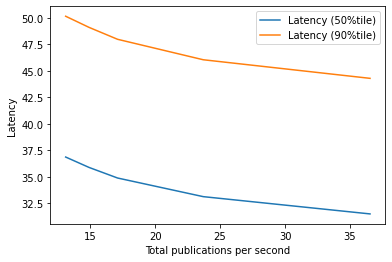

In [66]:
logfiles = glob.glob(RES_DIR + "/*.log")
percentile = 90

results50 = {}
results90 = {}

def set_p(res):
    nums50 = []
    nums90 = []
    for r in res:
        nums50.append(numpy.percentile(res[r], 50))
        nums90.append(numpy.percentile(res[r], 90))
        
    k = len(res)/RUNNING_TIME
    results50[k] = numpy.average(nums50)
    results90[k] = numpy.average(nums90)

for lf in logfiles:
    res = process_log(lf)
    fid = lf.split('/')[-1].split('.')[0]
    set_p(res)
    
# Make plot
def add_plot(r, label):
    lists = sorted(r.items())
    x, y = zip(*lists)
    plt.plot(x, y, label=label)

add_plot(results50, "Latency (50%tile)")
add_plot(results90, "Latency (90%tile)")
plt.xlabel("Total publications per second")
plt.ylabel("Latency".format(percentile))
plt.legend()
plt.show()